<a id="top"></a>
# Water Extents

<hr><hr>

# Notebook Summary

The spatial extents of water in a scene are analyzed with optical (Landsat) and SAR (Sentinel 1) data.

<hr><hr>

# Algorithmic process  

* [Import Dependencies and Connect to the Data Cube](#import)
* [Choose Platform and Product](#plat_prod)
* [Get the Maximum Extents of the Cube](#extents)
* [Define the Extents of the Analysis](#define_extents)
* [Load Data from the Data Cube](#retrieve_data)
    * Load Optical Data (Landsat)
    * Load SAR Data (Sentinel 1)
* [Get Water Classifications](#get_water_cls)
    * Get WOFS Classifications for Landsat Data
    * Get WASARD Classifications for Sentinel 1 Data
    * Combine and Resample Water Classifications
* [Examine the Minimum and Maximum Water Extents](#examine_water_extents)

For more information, visit this website: http://www.ga.gov.au/scientific-topics/hazards/flood/wofs

## <span id="import">Import Dependencies and Connect to the Data Cube [&#9652;](#top)</span>

In [1]:
# Enable importing of utilities.
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import xarray as xr
 
import datacube
from utils.data_cube_utilities.data_access_api import DataAccessApi

In [2]:
api = DataAccessApi()
dc = api.dc

## <span id="plat_prod">Choose Platform and Product [&#9652;](#top)</span>

In [3]:
# Get available products
products_info = dc.list_products()
products_info

,name,description,product_type,time,creation_time,format,lon,instrument,platform,lat,label,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
12,ls7_collections_sr_scene,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,GeoTiff,None,ETM,LANDSAT_7,None,None,NaN,NaN,NaN,NaN
13,ls7_ledaps_ghana,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,NetCDF,None,ETM,LANDSAT_7,None,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
17,ls7_ledaps_kenya,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,NetCDF,None,ETM,LANDSAT_7,None,None,EPSG:4326,"(-0.000269493, 0.000269493)","(0.99981903, 0.99981903)","(latitude, longitude)"
18,ls7_ledaps_senegal,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,NetCDF,None,ETM,LANDSAT_7,None,None,EPSG:4326,"(-0.000271152, 0.00027769)","(0.813456, 0.83307)","(latitude, longitude)"
16,ls7_ledaps_sierra_leone,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,NetCDF,None,ETM,LANDSAT_7,None,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
19,ls7_ledaps_tanzania,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,NetCDF,None,ETM,LANDSAT_7,None,None,EPSG:4326,"(-0.000271277688070265, 0.000271139577954979)","(0.999929558226998, 0.999962763497961)","(latitude, longitude)"
31,ls7_ledaps_vietnam,Landsat 7 USGS Collection 1 Higher Level SR sc...,LEDAPS,None,None,NetCDF,None,ETM,LANDSAT_7,None,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
7,ls8_collections_sr_scene,Landsat 8 USGS Collection 1 Higher Level SR sc...,LaSRC,None,None,GeoTiff,None,OLI_TIRS,LANDSAT_8,None,None,NaN,NaN,NaN,NaN
9,ls8_lasrc_ghana,Landsat 8 USGS Collection 1 Higher Level SR sc...,LaSRC,None,None,NetCDF,None,OLI_TIRS,LANDSAT_8,None,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"


In [4]:
# List LANDSAT 7 products (remove comments below to see list of products)
print("LANDSAT 7 Products:")
products_info[["platform", "name"]][products_info.platform == "LANDSAT_7"]

LANDSAT 7 Products:


,platform,name
id,,
12,LANDSAT_7,ls7_collections_sr_scene
13,LANDSAT_7,ls7_ledaps_ghana
17,LANDSAT_7,ls7_ledaps_kenya
18,LANDSAT_7,ls7_ledaps_senegal
16,LANDSAT_7,ls7_ledaps_sierra_leone
19,LANDSAT_7,ls7_ledaps_tanzania
31,LANDSAT_7,ls7_ledaps_vietnam


In [5]:
# List LANDSAT 8 products (remove comments below to see list of products)
print("LANDSAT 8 Products:")
products_info[["platform", "name"]][products_info.platform == "LANDSAT_8"]

LANDSAT 8 Products:


,platform,name
id,,
7,LANDSAT_8,ls8_collections_sr_scene
9,LANDSAT_8,ls8_lasrc_ghana
10,LANDSAT_8,ls8_lasrc_kenya
11,LANDSAT_8,ls8_lasrc_senegal
8,LANDSAT_8,ls8_lasrc_sierra_leone
15,LANDSAT_8,ls8_lasrc_tanzania


In [6]:
# List Sentinel 1 products (remove comments below to see list of products)
print("Sentinel 1 Products:")
products_info[["platform", "name"]][products_info.platform == "SENTINEL1"]

Sentinel 1 Products:


,platform,name
id,,


<p style="color:red";><b>CHANGE INPUTS BELOW

In [7]:
# These are the optical platforms (satellites) and 
# products (datacube sets) used for this demonstration.
use_Landsat7 = True
use_Landsat8 = True
optical_platforms = []
optical_products = []
if use_Landsat7:
    optical_platforms.append('LANDSAT_7')
    optical_products.append('ls7_ledaps_ghana')
if use_Landsat8:
    optical_platforms.append('LANDSAT_8')
    optical_products.append('ls8_lasrc_ghana')

# These are the SAR platforms (satellites) and 
# products (datacube sets) used for this demonstration.
sar_platforms = []
sar_products = []
# sar_platforms = ['SENTINEL1']
# sar_products = ['s1monthly_gamma0_ghana']

platforms = optical_platforms + sar_platforms
products = optical_products + sar_products
assert len(platforms) > 0, "There must be at least one platform (and corresponding product) selected."

# The fraction of the original resolution to use for analysis.
# Use this to control memory consumption and run time.
# Set this to None to not scale the resolution of the data.
frac_res = None

## <span id="extents">Get the Maximum Extents of the Cube [&#9652;](#top)</span>

In [9]:
from utils.data_cube_utilities.dc_load import get_overlapping_area
from utils.data_cube_utilities.dc_time import dt_to_str

full_lat, full_lon, min_max_dates = get_overlapping_area(api, platforms, products)

# Print the extents of each product.
str_min_max_dates = np.vectorize(dt_to_str)(min_max_dates)
for i, (platform, product) in enumerate(zip(platforms, products)):
    print("For platform {} and product {}:".format(platform, product))
    print("Time Extents:", str_min_max_dates[i])
    print()

# Print the extents of the combined data.
min_start_date_mutual = np.max(min_max_dates[:,0])
max_end_date_mutual = np.min(min_max_dates[:,1])
print("Overlapping Extents:")
print("Latitude Extents:", full_lat)
print("Longitude Extents:", full_lon)
print("Time Extents:", list(map(dt_to_str, (min_start_date_mutual, max_end_date_mutual))))

For platform LANDSAT_7 and product ls7_ledaps_ghana:
Time Extents: ['2000-01-01' '2017-12-28']

For platform LANDSAT_8 and product ls8_lasrc_ghana:
Time Extents: ['2013-04-13' '2018-01-01']

Overlapping Extents:
Latitude Extents: (3.772924193304, 11.318772579912)
Longitude Extents: (-3.772924193304, 1.886462096652)
Time Extents: ['2013-04-13', '2017-12-28']


In [10]:
from utils.data_cube_utilities.dc_display_map import display_map

# Display the total shared area available for these datacube products.
display_map(latitude = full_lat,longitude = full_lon)

## <span id="define_extents">Define the Extents of the Analysis [&#9652;](#top)</span>

<p style="color:red";><b>CHANGE INPUTS BELOW

In [11]:
# Select an analysis region (Lat-Lon) within the extents listed above. 
# If your datasets are empty, check which products and time extents you used.
# HINT: Keep your region small (<0.5 deg square) to avoid memory overload issues.
# Select a time period (Min-Max) within the extents listed above (Year-Month-Day).
# This region and time period will be used for the water assessment.

# Mombasa, Kenya
# lat = (-4.0475, -3.9574) 
# lon = (39.6028, 39.6792) 
# time_extents = ('2015-01-01', '2018-01-01')

# Ndakaini Dam, Kenya (provides water to Nairobi)
# lat =  (-0.8269, -0.8090)  # full
# lon =  (36.8192, 36.8529) # full
# lat =  (-0.8269, -0.8190)  # small
# lon =  (36.8392, 36.8429) # small
# time_extents = ('2000-01-01', '2018-01-01')

# Lake by Mankessim, Ghana
lat = (5.3010, 5.3240)
lon = (-1.0450, -1.0238)
time_extents = ('2015-01-01', '2018-12-31')

# Lake Sulunga, Tanzania
# latitude_extents = (-6.2622, -5.8822) 
# longitude_extents = (34.9802, 35.3602) 
# time_extents = ('2016-01-01', '2018-01-01')

**Visualize the selected area**

In [12]:
display_map(lat, lon)

## <span id="retrieve_data">Load Data from the Data Cube [&#9652;](#top)</span>

**Load Optical Data (Landsat)**

In [13]:
from utils.data_cube_utilities.dc_load import match_dim_sizes
from utils.data_cube_utilities.clean_mask import landsat_qa_clean_mask, landsat_clean_mask_invalid
from utils.data_cube_utilities.aggregate import xr_scale_res
from utils.data_cube_utilities.sort import xarray_sortby_coord

matching_abs_res, same_dim_sizes = match_dim_sizes(dc, products, lon, lat, method='min')

optical_datasets = {}
optical_clean_masks = {}
optical_cloud_masks = {}
for platform, product in zip(optical_platforms, optical_products):
    # Load the data.
    # We need the bands ['red', 'green', 'blue', 'nir', 'swir1', 'swir2'] because WOFS uses them.
    # We need the 'pixel_qa' band to mask out undesired pixels.
    measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']
    dataset = dc.load(platform=platform, product=product, 
                      lat=lat, lon=lon, 
                      time=time_extents, measurements=measurements)
    if len(dataset.dims) == 0: # The dataset is empty.
        continue
    # Get the clean masks.
    clean_mask = landsat_qa_clean_mask(dataset, platform) & \
                 (dataset[measurements[0]] != -9999) & \
                 landsat_clean_mask_invalid(dataset)
    cloud_mask = landsat_qa_clean_mask(dataset, platform, cover_types=['cloud'])
    # Remove the 'pixel_qa' band since we have the clean mask.
    dataset = dataset.drop('pixel_qa')
    # If needed, scale the datasets and clean masks to the same size in the x and y dimensions.
    if not same_dim_sizes:
        dataset = xr_scale_res(dataset, abs_res=matching_abs_res)
        clean_mask = xr_scale_res(clean_mask.astype(np.uint8), abs_res=matching_abs_res).astype(np.bool)
        cloud_mask = xr_scale_res(cloud_mask.astype(np.uint8), abs_res=matching_abs_res).astype(np.bool)
    # Clean the data.
    dataset = dataset.astype(np.float32).where(clean_mask)
    optical_datasets[product] = dataset
    optical_clean_masks[product] = clean_mask
    optical_cloud_masks[product] = cloud_mask
# Combine everything.
if len(optical_datasets) > 0:
    optical_dataset = xarray_sortby_coord(xr.concat(list(optical_datasets.values()), dim='time'), coord='time')
    optical_clean_mask = xarray_sortby_coord(xr.concat(list(optical_clean_masks.values()), dim='time'), coord='time')
    optical_cloud_mask = xarray_sortby_coord(xr.concat(list(optical_cloud_masks.values()), dim='time'), coord='time')
else:
    optical_dataset = xr.Dataset()
    optical_clean_mask = xr.DataArray(np.empty((0,), dtype=np.bool))
    optical_cloud_mask = xr.DataArray(np.empty((0,), dtype=np.bool))
del optical_datasets, optical_clean_masks, optical_cloud_masks

**Load SAR Data (Sentinel 1)**

In [14]:
sar_datasets = {}
sar_clean_masks = {}
for platform, product in zip(sar_platforms, sar_products):
    # Load the data.
    measurements = ['vv', 'vh']
    dataset = dc.load(platform=platform, product=product, lat=lat, lon=lon, 
                      time=time_extents, measurements=measurements)
    if len(dataset.dims) == 0: # The dataset is empty.
        continue
    # Get the clean masks.
    clean_mask = (dataset.vv != 0)
    # If needed, scale the datasets and clean masks to the same size in the x and y dimensions.
    if not same_dim_sizes:    
        dataset = xr_scale_res(dataset, abs_res=matching_abs_res)
        clean_mask = xr_scale_res(clean_mask.astype(np.uint8), abs_res=matching_abs_res).astype(np.bool)
    sar_datasets[product], sar_clean_masks[product] = dataset, clean_mask
# Combine everything.
if len(sar_datasets) > 0:
    sar_dataset = xarray_sortby_coord(xr.concat(list(sar_datasets.values()), dim='time'), coord='time')
    sar_clean_mask = xarray_sortby_coord(xr.concat(list(sar_clean_masks.values()), dim='time'), coord='time')
else:
    sar_dataset = xr.Dataset()
    sar_clean_mask = xr.DataArray(np.empty((0,), dtype=np.bool))
del sar_datasets, sar_clean_masks

In [15]:
from utils.data_cube_utilities.dc_load import is_dataset_empty

optical_dataset_is_empty = is_dataset_empty(optical_dataset)
sar_dataset_is_empty = is_dataset_empty(sar_dataset)
# Make coordinates other than time the same between the optical and SAR datasets.
if not optical_dataset_is_empty and not sar_dataset_is_empty:
    sar_dataset.latitude.values = optical_dataset.latitude.values
    sar_dataset.longitude.values = optical_dataset.longitude.values

## <span id="get_water_cls">Get Water Classifications [&#9652;](#top)</span>

**Get WOFS Classifications for Landsat Data**

In [16]:
if not optical_dataset_is_empty:
    from utils.data_cube_utilities.dc_water_classifier import wofs_classify
    optical_dataset['water'] = wofs_classify(optical_dataset, optical_clean_mask).wofs.astype(np.float16)
    optical_dataset['water'] = optical_dataset['water'].where(optical_clean_mask & (optical_dataset['water'] != -10000))

**Get WASARD Classifications for Sentinel 1 Data**

In [17]:
if not sar_dataset_is_empty:
    from utils.data_cube_utilities.wasard import wasard_classifier
    wasard_cls = wasard_classifier('wasard/general.pkl')
    sar_dataset['water'] = wasard_cls.wasard_classify(sar_dataset).wasard

**Combine and Resample Water Classifications**

In [18]:
water_datasets = []
if not optical_dataset_is_empty:
    water_datasets.append(optical_dataset.water)
if not sar_dataset_is_empty:
    water_datasets.append(sar_dataset.water)
water = xarray_sortby_coord(xr.concat(water_datasets, dim='time'), coord='time')

In [19]:
# Water classifiers can sometimes output erroneous classifications, so we take a rounded mean 
# of water classifications along time for windows of times to have a more reliable output.
# Must be a number followed by a letter. The number is the number of time periods
# for each composite. The letter is the unit of time and can be one of ['D', 'W', 'M', 'Y'],
# which are days, weeks, months, and years, respectively.
# Set this to None to use all original water classification time slices.
composite_period = None

water = water.resample(time=composite_period).mean('time').round() if composite_period is not None else water

## <span id="examine_water_extents">Examine the Minimum and Maximum Water Extents [&#9652;](#top)</span>

<p style="color:red";><b>CHANGE INPUTS BELOW

In [20]:
## Plot Formatting Settings ##

# Formatting for full-width plots.
title_fontdict = dict(fontsize=16) # Title formatting
tick_label_fmt_dict = dict(axis='both', labelsize=12) # Tick label formatting
axis_label_fmt_dict = dict(fontsize=16) # Axis label formatting
legend_kwargs = dict(fontsize=12)

std_dpi = 200 # Standard image dpi.

## End Plot Formatting Settings ##

**Obtain the minimum and maximum water extents.**

<p style="color:red";><b>CHANGE INPUTS BELOW

In [21]:
## Settings ##

# Can be any of ['time-slice', 'per-pixel'].
# The value 'time-slice' obtains the minimum and maximum water extents on an time-slice basis.
# The value 'per-pixel' obtains the minumum and maximum water extents on a per-pixel basis.
water_extent_method = 'time-slice'
assert water_extent_method in ['time-slice', 'per-pixel'], \
    "The setting `water_extent_method` must be one of ['time-slice', 'per-pixel']."

# This setting is only relevant if `water_extent_method` is set to 'time-slice'.
# Water classifiers can sometimes output erroneous classifications and sometimes excessive clouds
# make compositing an impractical solution to accounting for noisy classifications. 
# And SAR data is sometimes unavailable for WASARD water classification over cloudy regions,
# so percentiles can be specified for the minimum and maximum time slices. These can be between
# 0 and 100. The minimum water time-slice selected will be the time slice with non-water extents
# at or below `percentile_min`. The maximum water time-slice selected will be the time slice 
# with water extents at or below `percentile_max`.
percentile_min, percentile_max = 95, 90

## End Settings ##

# Option 1: Obtain the acquisitions with the minimum and maximum water extents.
if water_extent_method == 'time-slice':
    count_non_water = water.where(water == 0).count(dim=['latitude', 'longitude'])
    count_water = water.where(water == 1).count(dim=['latitude', 'longitude'])
    
    # Find the acquisition with the least water (the one with the most non-water pixels).
    percentile_value_min = np.percentile(count_non_water, percentile_min, interpolation='lower')
    # Handle the case of multiple acquisitions with the same amount of non-water (notably 0).
    acqs_with_value_min = count_non_water == percentile_value_min
    if acqs_with_value_min.sum() > 1: # Find the acquisition with the least water (and most non-water).
        min_extent_time_ind = np.argmin(count_water.isel(time=acqs_with_value_min).values)
    else:
        min_extent_time_ind = (count_non_water == percentile_value_min).argmax().values
    min_extent_time = water.time.values[min_extent_time_ind]
    min_water_extent = water.isel(time=min_extent_time_ind)

    # Find the acquisition with the most water (the one with the most water pixels).
    percentile_value_max = np.percentile(count_water, percentile_max, interpolation='lower')
    # Handle the case of multiple acquisitions with the same amount of water (notably 0).
    acqs_with_value_max = count_water == percentile_value_max
    if acqs_with_value_max.sum() > 1: # Find the acquisition with the least non-water (and most water).
        max_extent_time_ind = np.argmin(count_non_water.isel(time=acqs_with_value_max).values)
    else:
        max_extent_time_ind = (count_water == percentile_value_max).argmax().values
    max_extent_time = water.time.values[max_extent_time_ind]
    max_water_extent = water.isel(time=max_extent_time_ind)
    
# Option 2: Obtain the minimum and maximum water extents on a per-pixel basis.
else: 
    min_water_extent = water.min('time')
    max_water_extent = water.max('time')

**Show the minimum and maximum water extents.**

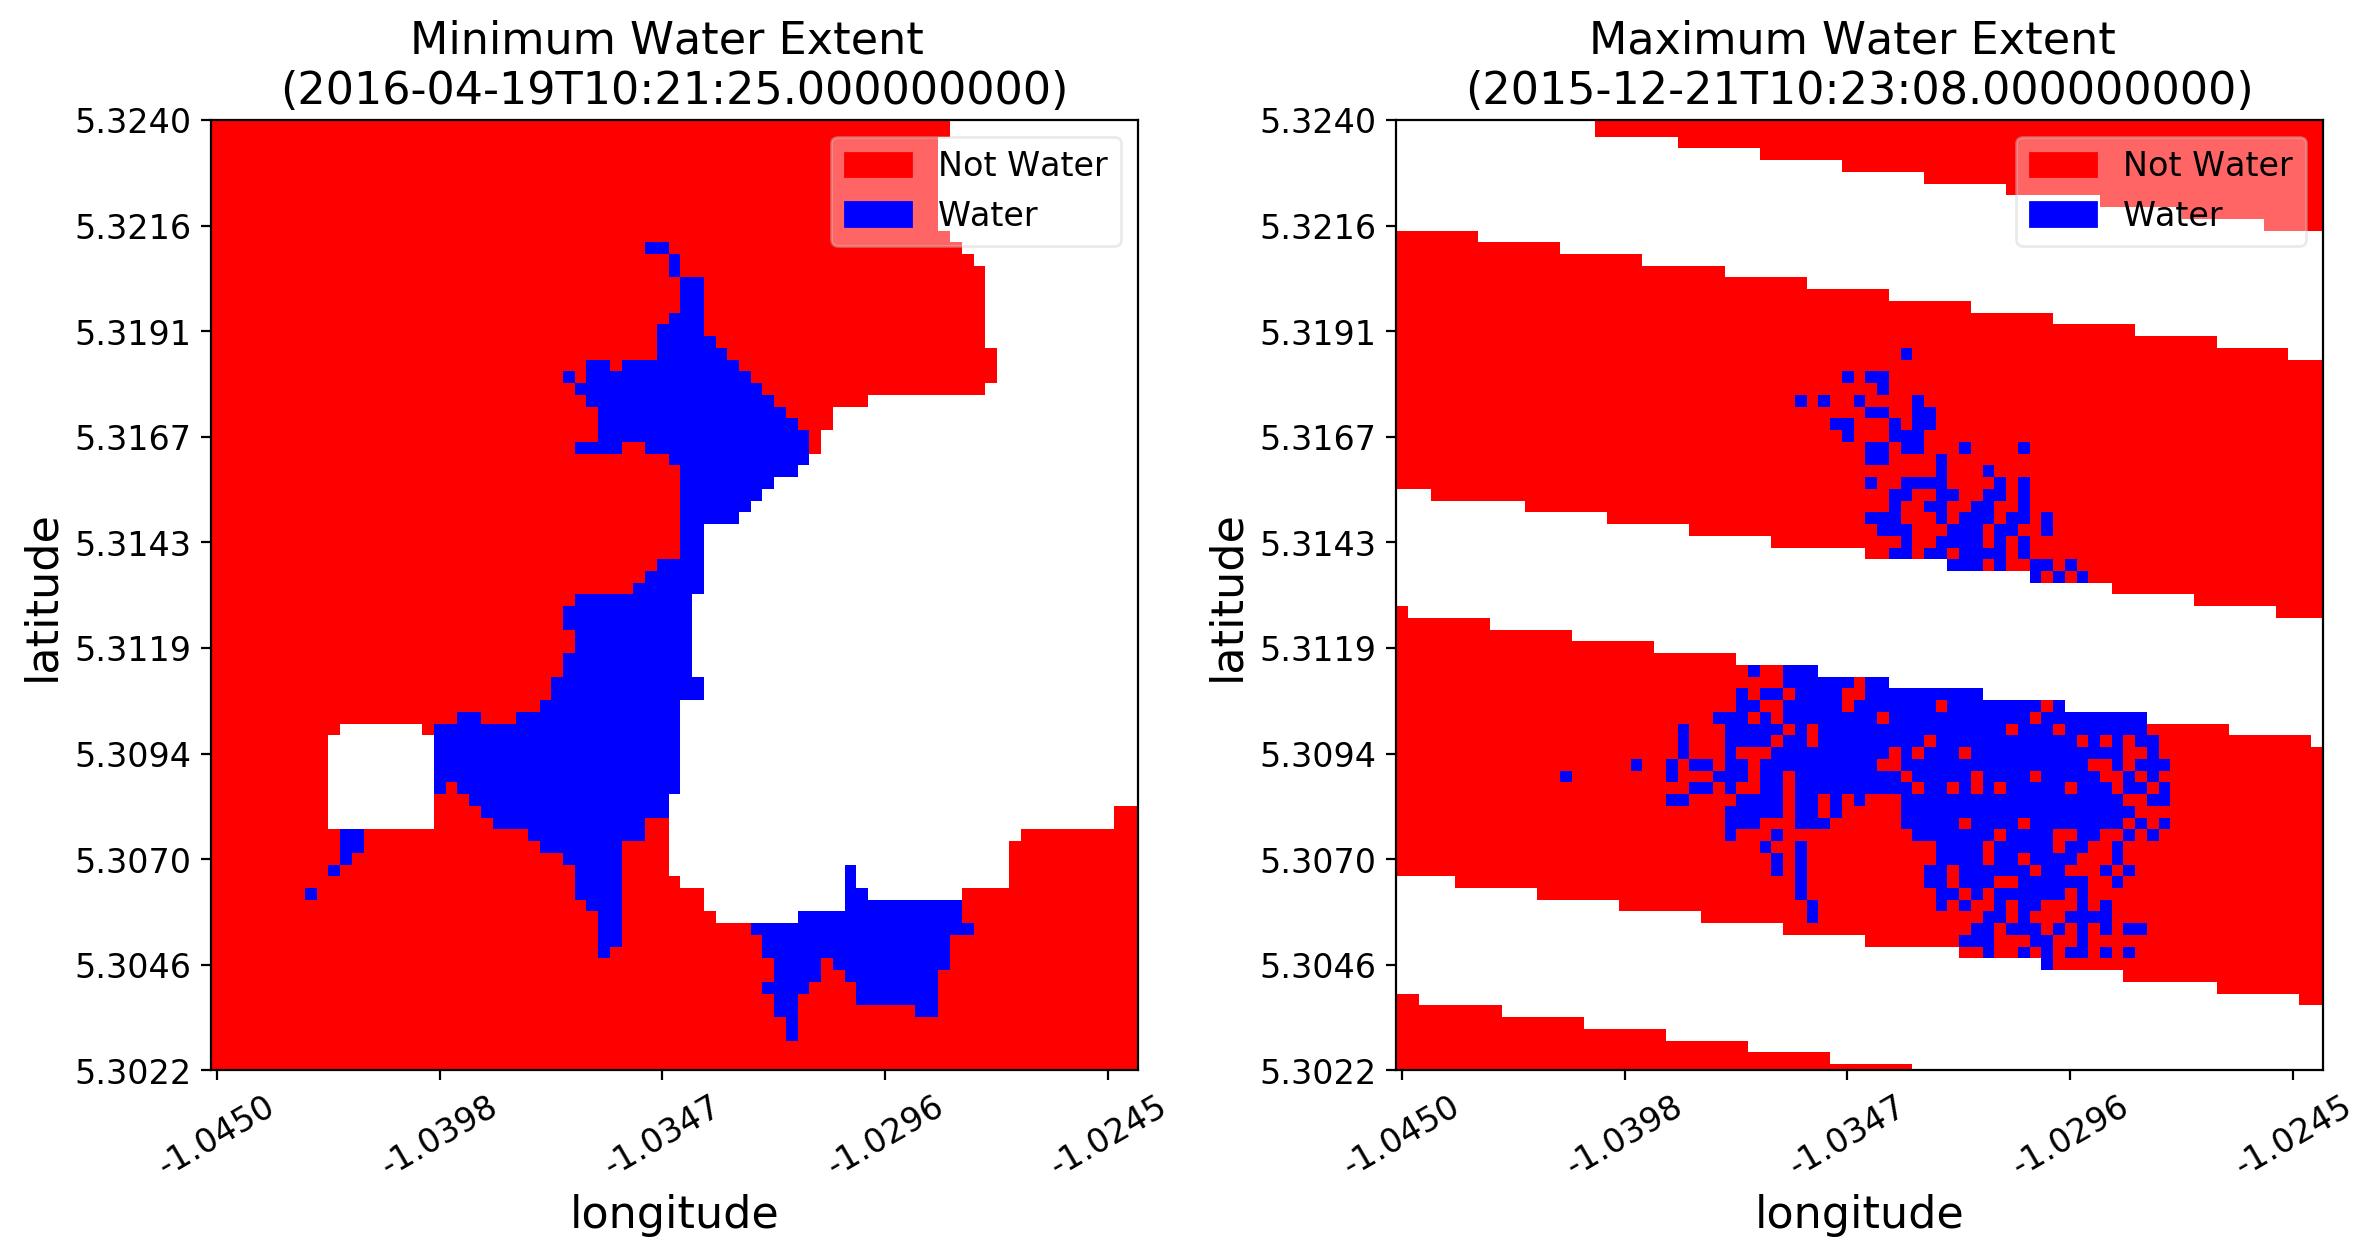

In [22]:
from utils.data_cube_utilities.plotter_utils import figure_ratio, create_discrete_color_map, xarray_imshow

# Begin plotting the data
fig_width = 12 # Use this to change the size of this figure.
fig = plt.figure(figsize=figure_ratio(water, fixed_width=fig_width), dpi=std_dpi)

# Create common colormap.
cmap = create_discrete_color_map([0,1], ['red', 'blue'])

imshow_kwargs = dict(vmin=0, vmax=1, cmap=cmap)

legend_labels = {0:'Not Water', 1:'Water'}

# Minimum water extent
ax = plt.subplot(1,2,1)
fig, ax, im, cbar = \
    xarray_imshow(min_water_extent.astype(np.float32), fig=fig, ax=ax, use_colorbar=False, use_legend=True, 
                  legend_labels=legend_labels, imshow_kwargs=imshow_kwargs, 
                  x_label_kwargs=axis_label_fmt_dict, y_label_kwargs=axis_label_fmt_dict,
                  legend_kwargs=legend_kwargs)
ax.set_title("Minimum Water Extent \n({})".format(min_extent_time), fontdict=title_fontdict)
ax.tick_params(**tick_label_fmt_dict)

# Maximum water extent
ax = plt.subplot(1,2,2)
fig, ax, im, cbar = \
    xarray_imshow(max_water_extent.astype(np.float32), fig=fig, ax=ax, use_colorbar=False, use_legend=True, 
                  legend_labels=legend_labels, imshow_kwargs=imshow_kwargs,
                  x_label_kwargs=axis_label_fmt_dict, y_label_kwargs=axis_label_fmt_dict,
                  legend_kwargs=legend_kwargs)
ax.set_title("Maximum Water Extent \n({})".format(max_extent_time), fontdict=title_fontdict)
ax.tick_params(**tick_label_fmt_dict)

plt.tight_layout()
plt.show()

**For the minimum and maximum water extents, print the percents of pixels that are water, not water, or cloud.**

In [23]:
# Determine the percent of water and non-water pixels for the minimum extent.
num_water_min = (min_water_extent == 1).sum().values
pct_water_min = num_water_min / min_water_extent.size
num_non_water_min = (min_water_extent == 0).sum().values
pct_non_water_min = num_non_water_min / min_water_extent.size

# Determine the percent of water and non-water pixels for the maximum extent.
num_water_max = (max_water_extent == 1).sum().values
pct_water_max = num_water_max / max_water_extent.size
num_non_water_max = (max_water_extent == 0).sum().values
pct_non_water_max = num_non_water_max / max_water_extent.size

# Determine the fraction of cloud pixels for the minium and maximum extents.
if optical_dataset_is_empty: # SAR data is largely unaffected by clouds.
    num_cloud_min, pct_cloud_min, num_cloud_max, pct_cloud_max = [0]*4
else: # Handle time-slice-based extents.
    if water_extent_method == 'time-slice':
        min_acq_is_optical = np.any(optical_cloud_mask.time.values == min_extent_time)
        num_cloud_min = optical_cloud_mask.sel(time=min_extent_time).sum().values \
                        if min_acq_is_optical else 0
        pct_cloud_min = num_cloud_min / min_water_extent.size

        max_acq_is_optical = np.any(optical_cloud_mask.time.values == max_extent_time)
        num_cloud_max = optical_cloud_mask.sel(time=max_extent_time).sum().values \
                        if max_acq_is_optical else 0
        pct_cloud_max = num_cloud_max / max_water_extent.size
    else: # Handle per-pixel extents.
        cloud_masks = []
        if not optical_dataset_is_empty:
            cloud_masks.append(~optical_cloud_mask)
        if not sar_dataset_is_empty:
            cloud_masks.append(sar_clean_mask)
        combined_cloud_mask = xr.concat(cloud_masks, dim='time')
        num_cloud_min = (~combined_cloud_mask).min('time').sum().values
        pct_cloud_min = num_cloud_min / min_water_extent.size
        # For both min and max extents, cloud pixels will be minimized because cloud pixels are masked to NaN,
        # which is ignored (avoided) by the min and max operations for xarrays.
        num_cloud_max = num_cloud_min 
        pct_cloud_max = num_cloud_max / max_water_extent.size

# Determine the percent of no_data values for hte minimum and maximum extents.
num_nodata_min = int(min_water_extent.size - sum([num_water_min, num_non_water_min, num_cloud_min]))
pct_nodata_min = num_nodata_min / min_water_extent.size
num_nodata_max = int(max_water_extent.size - sum([num_water_max, num_non_water_max, num_cloud_max]))
pct_nodata_max = num_nodata_max / max_water_extent.size

print("""The minimum water extent image is composed of the following classes:
    Water ({} pixels - {:.2%} of all pixels)
    Not Water ({} pixels - {:.2%} of all pixels)
    Cloud ({} pixels - {:.2%} of all pixels)
    No-data ({} pixels - {:.2%} of all pixels)"""
    .format(num_water_min, pct_water_min, 
            num_non_water_min, pct_non_water_min, 
            num_cloud_min, pct_cloud_min,
            num_nodata_min, pct_nodata_min))
print()
print("""The maximum water extent image is composed of the following classes:
    Water ({} pixels - {:.2%} of all pixels)
    Not Water ({} pixels - {:.2%} of all pixels),
    Cloud ({} pixels - {:.2%} of all pixels)
    No-data ({} pixels - {:.2%} of all pixels)"""
    .format(num_water_max, pct_water_max, 
            num_non_water_max, pct_non_water_max, 
            num_cloud_max, pct_cloud_max,
            num_nodata_max, pct_nodata_max))

The minimum water extent image is composed of the following classes:
    Water (706 pixels - 10.39% of all pixels)
    Not Water (4168 pixels - 61.35% of all pixels)
    Cloud (436 pixels - 6.42% of all pixels)
    No-data (1484 pixels - 21.84% of all pixels)

The maximum water extent image is composed of the following classes:
    Water (582 pixels - 8.57% of all pixels)
    Not Water (3715 pixels - 54.68% of all pixels),
    Cloud (0 pixels - 0.00% of all pixels)
    No-data (2497 pixels - 36.75% of all pixels)
